In [215]:
%load_ext autoreload
%autoreload 2

from constants_and_utils import *

from generate_personas import *
from generate_networks import *
from analyze_networks import *
from plotting import *
from network_datasets import *

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
network_df = pd.read_csv(f'stats/real/network_metrics.csv')
metric_dfs = [network_df]
homophily_dfs = []

# load network metrics and homophily for generated networks
model = 'gpt-3.5-turbo'
for extension in ['']:
    metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))
    
try:
    model = 'gpt-4o-mini'
    for extension in ['']:
        metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
        homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))
except:
    print("gpt-4o-mini not found")
try:
    
    model = 'gpt-4o'
    for extension in ['']:
        metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
        homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))
except:
    print("gpt-4o not found")

try:
    model = 'llama3.1-70b'
    for extension in ['']:
        metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
        homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))
except:
    print("llama3.1-70b not found")
    
try:
    model = 'grok-2-latest'
    for extension in ['']:
        metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
        homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))
except:
    print("grok-2-latest not found")

network_df = pd.concat(metric_dfs)
print(network_df.groupby('save_name').size())

save_name
real                        1097
sequential_gpt-3.5-turbo     132
sequential_gpt-4o            132
sequential_gpt-4o-mini       132
sequential_grok-2-latest     132
sequential_llama3.1-70b      132
dtype: int64


# Analyze networks

In [217]:
homophily_df = pd.concat(homophily_dfs)
print(homophily_df.groupby('save_name').size())

save_name
sequential_gpt-3.5-turbo    110
sequential_gpt-4o           110
sequential_gpt-4o-mini      110
sequential_grok-2-latest    110
sequential_llama3.1-70b     110
dtype: int64


In [218]:
def rename_network_metrics(n):
    if n == 'prop_nodes_lcc':
        return 'Prop nodes LCC'
    n = n.split('_')
    n = ' '.join(n)
    return n.capitalize()

for n in network_df['metric_name'].unique():
    print(n, rename_network_metrics(n))
    
network_df['metric_name'] = network_df['metric_name'].apply(rename_network_metrics)
network_df.head(3000)

density Density
avg_clustering_coef Avg clustering coef
prop_nodes_lcc Prop nodes LCC
radius Radius
diameter Diameter
avg_shortest_path Avg shortest path
modularity Modularity
degree_centrality Degree centrality
betweenness_centrality Betweenness centrality
closeness_centrality Closeness centrality
assortativity Assortativity
efficiency Efficiency
degree_gini Degree gini
pagerank_avg Pagerank avg
pagerank_normalized_entropy Pagerank normalized entropy


,graph_nr,metric_name,_metric_value,save_name,node
0,0.0,Density,0.144444,real,NaN
1,0.0,Avg clustering coef,0.415549,real,NaN
2,0.0,Prop nodes LCC,0.916667,real,NaN
3,0.0,Radius,0.857999,real,NaN
4,0.0,Diameter,1.429998,real,NaN
...,...,...,...,...,...
127,10.0,Assortativity,-0.137437,sequential_grok-2-latest,NaN
128,10.0,Efficiency,0.520461,sequential_grok-2-latest,NaN
129,10.0,Degree gini,0.259540,sequential_grok-2-latest,NaN
130,10.0,Pagerank avg,0.010000,sequential_grok-2-latest,NaN


In [219]:
network_df["save_name"].value_counts()

save_name
real                        1097
sequential_gpt-3.5-turbo     132
sequential_gpt-4o-mini       132
sequential_gpt-4o            132
sequential_llama3.1-70b      132
sequential_grok-2-latest     132
Name: count, dtype: int64

In [220]:
network_df["metric_name"].value_counts()

metric_name
Degree centrality              347
Betweenness centrality         347
Closeness centrality           347
Density                         63
Avg clustering coef             63
Prop nodes LCC                  63
Radius                          63
Diameter                        63
Avg shortest path               63
Modularity                      63
Assortativity                   55
Efficiency                      55
Degree gini                     55
Pagerank avg                    55
Pagerank normalized entropy     55
Name: count, dtype: int64

In [221]:
# GPT 3.5
x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Assortativity', 'Efficiency', 'Degree gini','Pagerank normalized entropy']
network_df[network_df['metric_name'].isin(x_to_keep) & network_df.save_name.str.contains('gpt-3.5')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)

count   mean    sem
save_name                metric_name                                     
sequential_gpt-3.5-turbo Assortativity                   11 -0.292  0.014
                         Avg clustering coef             11  0.398  0.024
                         Avg shortest path               11  0.501  0.006
                         Degree gini                     11  0.376  0.009
                         Density                         11  0.093  0.002
                         Efficiency                      11  0.482  0.005
                         Modularity                      11  0.355  0.017
                         Pagerank normalized entropy     11  0.957  0.004
                         Prop nodes LCC                  11  1.000  0.000

In [222]:
# GPT 4 and 4mini
x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Assortativity', 'Efficiency', 'Degree gini','Pagerank normalized entropy']
network_df[network_df['metric_name'].isin(x_to_keep) & network_df.save_name.str.contains('gpt-4')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)

count   mean    sem
save_name              metric_name                                     
sequential_gpt-4o      Assortativity                   11 -0.146  0.033
                       Avg clustering coef             11  0.706  0.009
                       Avg shortest path               11  0.589  0.047
                       Degree gini                     11  0.272  0.010
                       Density                         11  0.224  0.007
                       Efficiency                      11  0.425  0.019
                       Modularity                      11  0.484  0.012
                       Pagerank normalized entropy     11  0.987  0.000
                       Prop nodes LCC                  11  0.822  0.075
sequential_gpt-4o-mini Assortativity                   11 -0.372  0.005
                       Avg clustering coef             11  0.623  0.006
                       Avg shortest path               11  0.591  0.012
                       Degree gini                     11  0.255  0.003
                       Density                         11  0.181  0.004
                       Efficiency                      11  0.477  0.005
                       Modularity                      11  0.496  0.002
                       Pagerank normalized entropy     11  0.983  0.000
                       Prop nodes LCC                  11  1.000  0.000

In [223]:
# sequential_grok-2-latest 
x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Assortativity', 'Efficiency', 'Degree gini','Pagerank normalized entropy']
network_df[network_df['metric_name'].isin(x_to_keep) & network_df.save_name.str.contains('grok-2-latest')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)

count   mean    sem
save_name                metric_name                                     
sequential_grok-2-latest Assortativity                   11 -0.193  0.031
                         Avg clustering coef             11  0.720  0.006
                         Avg shortest path               11  0.551  0.026
                         Degree gini                     11  0.235  0.005
                         Density                         11  0.199  0.005
                         Efficiency                      11  0.501  0.009
                         Modularity                      11  0.513  0.012
                         Pagerank normalized entropy     11  0.989  0.001
                         Prop nodes LCC                  11  1.000  0.000

In [224]:
# Llama
x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Assortativity', 'Efficiency', 'Degree gini','Pagerank normalized entropy']
network_df[network_df['metric_name'].isin(x_to_keep) & network_df.save_name.str.contains('llama')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)

count   mean    sem
save_name               metric_name                                     
sequential_llama3.1-70b Assortativity                   11 -0.299  0.015
                        Avg clustering coef             11  0.707  0.007
                        Avg shortest path               11  0.521  0.008
                        Degree gini                     11  0.218  0.003
                        Density                         11  0.258  0.004
                        Efficiency                      11  0.535  0.004
                        Modularity                      11  0.492  0.002
                        Pagerank normalized entropy     11  0.988  0.000
                        Prop nodes LCC                  11  1.000  0.000

In [225]:
plot_metrics_separately

<function plotting.plot_metrics_separately(network_metrics_df, save_name=None, plot_type='default', x_to_keep=None, simplify_legend=True, legend_mapper=None, palette=None, dodge=0.6)>

Dropping node-level stats: kept 716 out of 1757 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 315 out of 716 rows


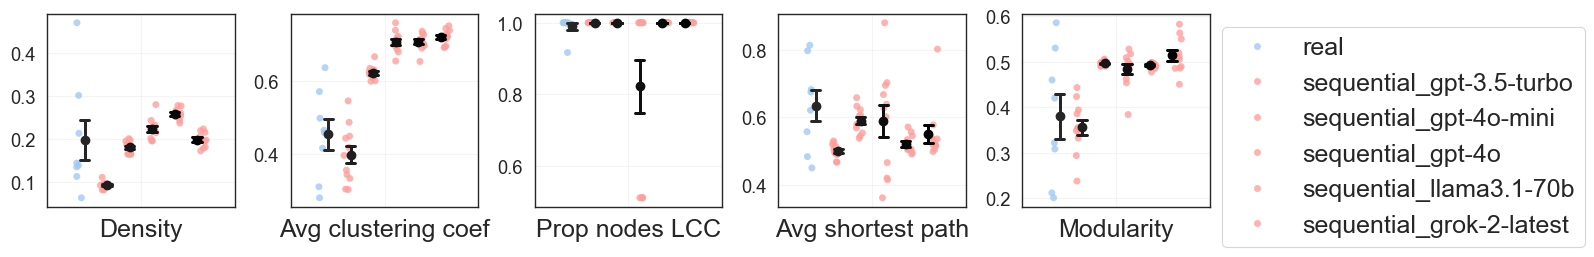

In [226]:
# main results - Metrics that we can compare with real
x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']

to_keep = ['real', 'sequential_gpt-3.5-turbo','sequential_gpt-4o-mini','sequential_gpt-4o','sequential_llama3.1-70b','sequential_grok-2-latest']
kept_df = network_df[network_df.save_name.isin(to_keep)]
plot_metrics_separately(kept_df, plot_type='default', x_to_keep=x_to_keep, 
                            simplify_legend=False, legend_mapper=None)

Dropping node-level stats: kept 716 out of 1757 rows
Keeping rows in ['Assortativity', 'Efficiency', 'Degree gini', 'Pagerank normalized entropy']: kept 220 out of 716 rows


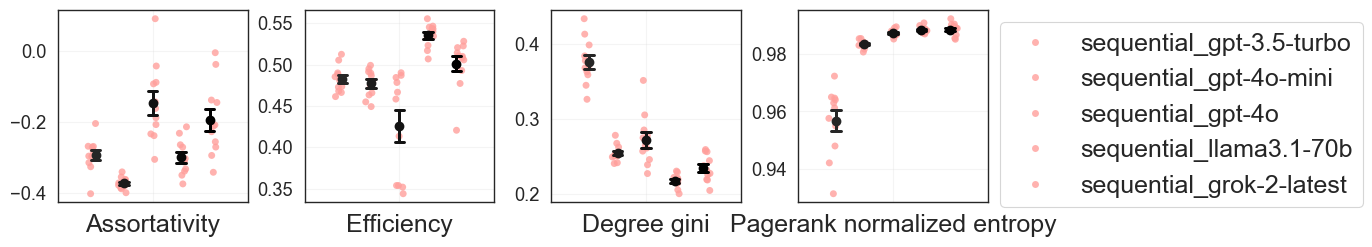

In [227]:
# main results - metrics that we do not have real values
x_to_keep = ['Assortativity', 'Efficiency', 'Degree gini','Pagerank normalized entropy']
to_keep = ['real', 'sequential_gpt-3.5-turbo','sequential_gpt-4o-mini','sequential_gpt-4o','sequential_llama3.1-70b','sequential_grok-2-latest']
kept_df = network_df[network_df.save_name.isin(to_keep)]
plot_metrics_separately(kept_df, plot_type='default', x_to_keep=x_to_keep, 
                            simplify_legend=False, legend_mapper=None)

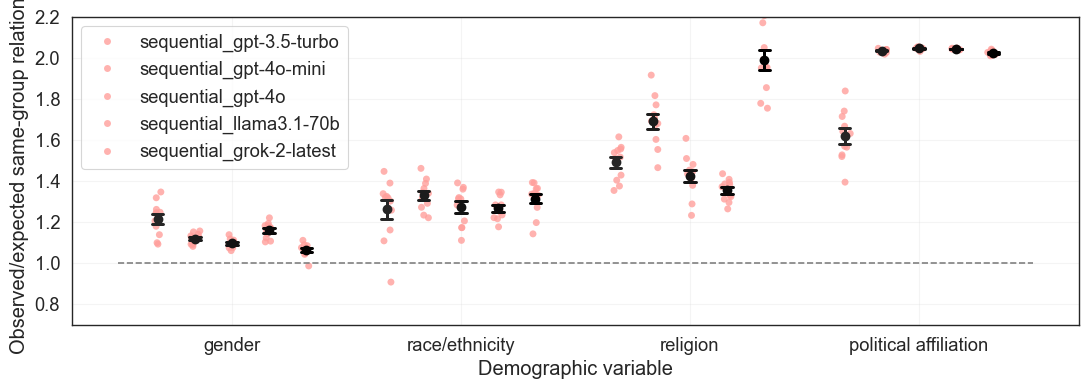

In [228]:
# GPT 3.5 - main results on homophily
to_keep = ['real', 'sequential_gpt-3.5-turbo','sequential_gpt-4o-mini','sequential_gpt-4o','sequential_llama3.1-70b','sequential_grok-2-latest']

kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', y_lim=(0.7, 2.2), figsize=(13, 4), dodge=0.65, simplify_legend=False)

Dropping node-level stats: kept 452 out of 1493 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 205 out of 452 rows


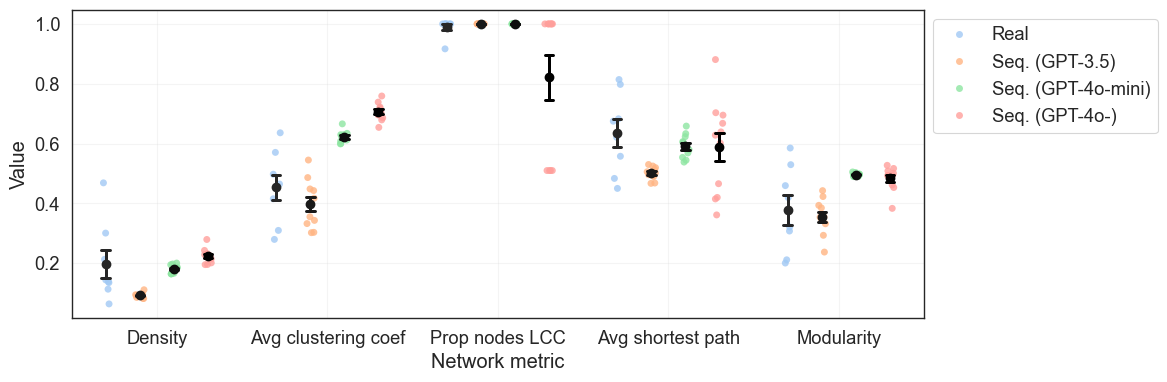

Dropping node-level stats: kept 452 out of 1493 rows
Keeping rows in ['Assortativity', 'Efficiency', 'Degree gini', 'Pagerank normalized entropy']: kept 132 out of 452 rows


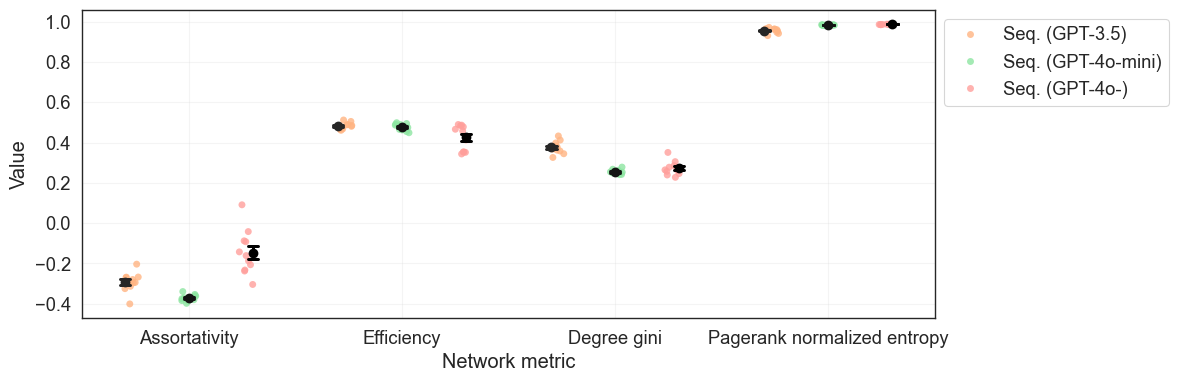

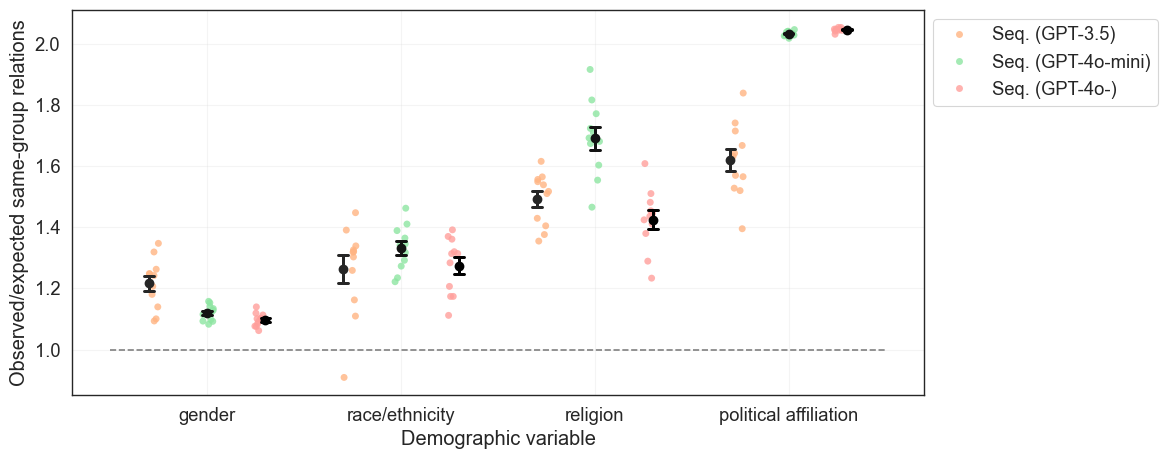

In [229]:
# compare GPT 3.5 vs GPT 4o vs CGT 40-mini
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_gpt-4o-mini','sequential_gpt-4o']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real',
                 'sequential_gpt-3.5-turbo': 'Seq. (GPT-3.5)',
                 'sequential_gpt-4o-mini': 'Seq. (GPT-4o-mini)',
                 'sequential_gpt-4o': 'Seq. (GPT-4o-)'}
pastel_palette = sns.color_palette("pastel")
colors = {'real': pastel_palette[0],
          'sequential_gpt-3.5-turbo': pastel_palette[1],
          'sequential_gpt-4o-mini': pastel_palette[2],
          'sequential_gpt-4o':  pastel_palette[3]}

x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1,1))

to_keep.remove('real')
x_to_keep = ['Assortativity', 'Efficiency', 'Degree gini','Pagerank normalized entropy']
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1,1))

kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.60, figsize=(11, 5), legend_pos=(1,1))

Dropping node-level stats: kept 716 out of 1757 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 315 out of 716 rows


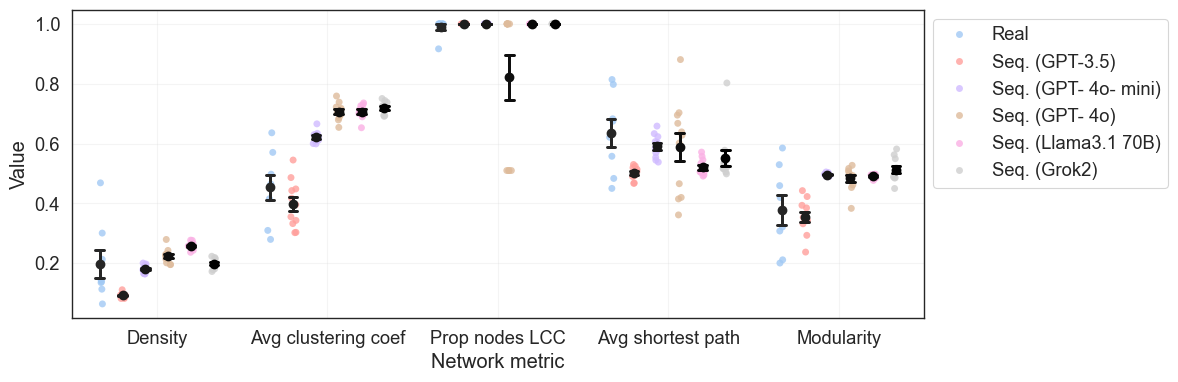

Dropping node-level stats: kept 716 out of 1757 rows
Keeping rows in ['Assortativity', 'Efficiency', 'Degree gini', 'Pagerank normalized entropy']: kept 220 out of 716 rows


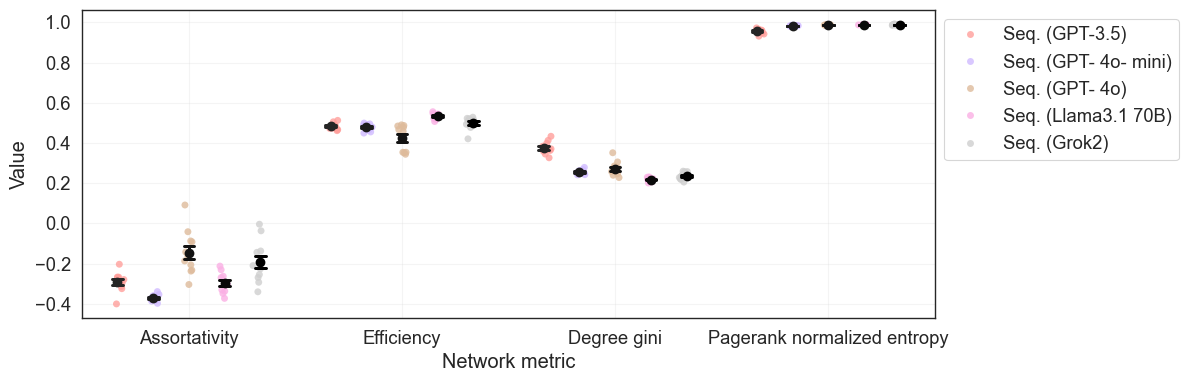

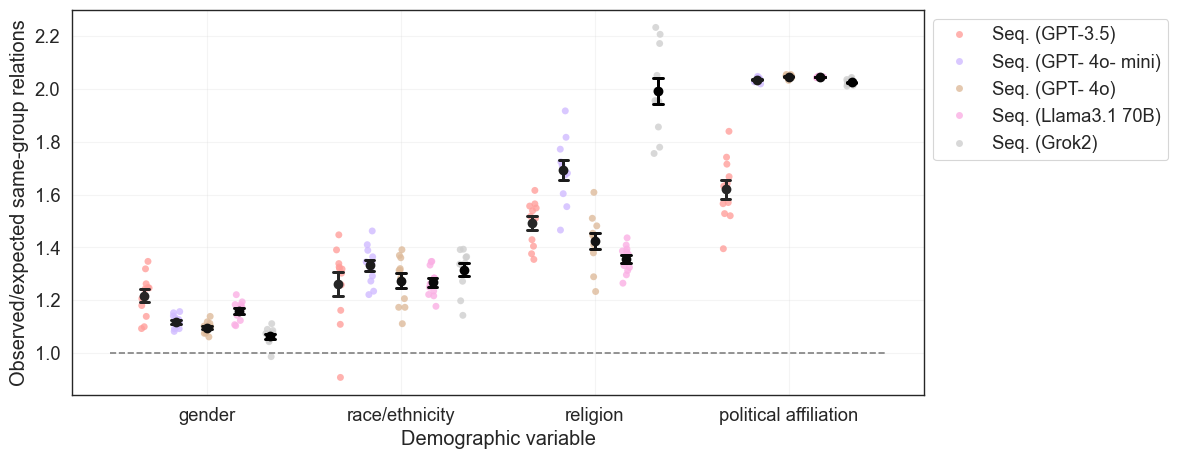

In [230]:
# compare ALL
to_keep = ['real', 'sequential_gpt-3.5-turbo','sequential_gpt-4o-mini','sequential_gpt-4o','sequential_llama3.1-70b','sequential_grok-2-latest']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real', 
                 'sequential_gpt-3.5-turbo': 'Seq. (GPT-3.5)',
                 'sequential_gpt-4o-mini': 'Seq. (GPT- 4o- mini)',
                 'sequential_gpt-4o': 'Seq. (GPT- 4o)',
                 'sequential_llama3.1-70b': 'Seq. (Llama3.1 70B)',
                 'sequential_grok-2-latest': 'Seq. (Grok2)'}
colors = {'real': pastel_palette[0], 
                 'sequential_gpt-3.5-turbo': pastel_palette[3],
                 'sequential_gpt-4o-mini': pastel_palette[4],
                 'sequential_gpt-4o': pastel_palette[5],
                 'sequential_llama3.1-70b': pastel_palette[6],
                 'sequential_grok-2-latest': pastel_palette[7]}
x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1,1), dodge=0.67)

to_keep.remove('real')
x_to_keep = ['Assortativity', 'Efficiency', 'Degree gini','Pagerank normalized entropy']
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, figsize=(11, 4), legend_pos=(1,1), dodge=0.67)

kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          dodge=0.65, figsize=(11, 5), legend_pos=(1,1))

In [231]:
real_df = load_real_homophily(same_group=True)
real_df.sort_values('save_name').round(2)

C:\Users\carlo\llm-social-network\analyze_networks.py:113: RuntimeWarning: overflow encountered in scalar multiply
  total_num_edges = num_nodes * (num_nodes-1) / 2


,save_name,demo,_metric_value
4,gss-1985,gender,1.19
2,gss-1985,race/ethnicity,1.32
3,gss-1985,religion,1.63
7,gss-2004,gender,1.12
5,gss-2004,race/ethnicity,1.47
6,gss-2004,religion,2.08
0,laniado-friend,gender,0.00
1,laniado-interaction,gender,0.00
10,myspace,gender,0.96
8,myspace,race/ethnicity,1.96


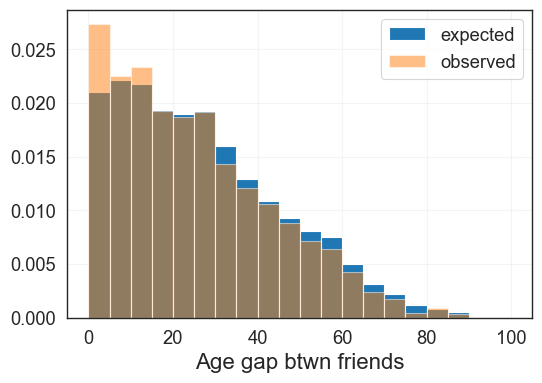

In [232]:
# age homophily
fn = os.path.join(PATH_TO_TEXT_FILES, '100_individuals.json')
with open(fn) as f:
    personas = json.load(f)

method = 'sequential'
model = 'gpt-3.5-turbo'
list_of_G = load_list_of_graphs(f'{method}_{model}', 0, 10, directed=False)
plot_expected_vs_observed_age_gaps(list_of_G, personas)

In [233]:
def report_isolation_index(method, model):
    list_of_G = load_list_of_graphs(f'{method}_{model}', 0, 11, directed=False)
    print(f'{method}_{model}: found {len(list_of_G)} graphs')
    isolation = []
    exposure_c = []
    exposure_l = []
    for G in list_of_G:
        i, c, l = compute_isolation_index(G, personas)
        isolation.append(i)
        exposure_c.append(c)
        exposure_l.append(l)
    print(f'Isolation: {np.mean(isolation):0.3f}, {np.std(isolation)/np.sqrt(len(isolation)):0.3f}')
    print(f'Avg exposure, conservative: {np.mean(exposure_c):0.3f}, {np.std(exposure_c)/np.sqrt(len(exposure_c)):0.3f}')
    print(f'Avg exposure, liberal: {np.mean(exposure_l):0.3f}, {np.std(exposure_l)/np.sqrt(len(exposure_l)):0.3f}')
method='sequential'
for model in ['gpt-3.5-turbo','gpt-4o-mini','llama3.1-70b','grok-2-latest']:
    print(model)
    report_isolation_index(method, model)
    print()


gpt-3.5-turbo
sequential_gpt-3.5-turbo: found 11 graphs
Isolation: 0.492, 0.037
Avg exposure, conservative: 0.719, 0.024
Avg exposure, liberal: 0.227, 0.016

gpt-4o-mini
sequential_gpt-4o-mini: found 11 graphs
Isolation: 0.987, 0.003
Avg exposure, conservative: 0.993, 0.001
Avg exposure, liberal: 0.007, 0.001

llama3.1-70b
sequential_llama3.1-70b: found 11 graphs
Isolation: 0.988, 0.001
Avg exposure, conservative: 0.994, 0.001
Avg exposure, liberal: 0.006, 0.001

grok-2-latest
sequential_grok-2-latest: found 11 graphs
Isolation: 0.966, 0.005
Avg exposure, conservative: 0.982, 0.002
Avg exposure, liberal: 0.017, 0.003



In [234]:
def report_polarization(method, model):
    list_of_G = load_list_of_graphs(f'{method}_{model}', 0, 10, directed=False)
    print(f'{method}_{model}: found {len(list_of_G)} graphs')
    pol = []
    for G in list_of_G:
        p = compute_polarization(G, personas)
        pol.append(p)
        #print(p)
        #print(p.shape)
    print(f'Polarization: mean={np.mean(pol):0.3f}, se={np.std(pol)/np.sqrt(len(pol)):0.3f}')

model = 'sequential'
for model in ['gpt-3.5-turbo','gpt-4o-mini','llama3.1-70b','grok-2-latest']:
    print(method)
    report_polarization(method, model)
    print()

sequential
sequential_gpt-3.5-turbo: found 10 graphs
Polarization: mean=0.498, se=0.073

sequential
sequential_gpt-4o-mini: found 10 graphs
Polarization: mean=0.874, se=0.019

sequential
sequential_llama3.1-70b: found 10 graphs
Polarization: mean=0.906, se=0.019

sequential
sequential_grok-2-latest: found 10 graphs
Polarization: mean=0.870, se=0.030



In [235]:
def report_polarization(method, model):
    list_of_G = load_list_of_graphs(f'{method}_{model}', 0, 10, directed=False)
    print(f'{method}_{model}: found {len(list_of_G)} graphs')
    pol = []
    for G in list_of_G:
        p = compute_polarization(G, personas)
        pol.append(p)
        #print(p.shape)
    mean_pol = np.mean(pol)
    se_pol = np.std(pol) / np.sqrt(len(pol))
    print(f'Polarization: mean={mean_pol:0.3f}, se={se_pol:0.3f}')
    return mean_pol, se_pol

In [236]:
import matplotlib.pyplot as plt
import numpy as np

method = 'sequential'
models = ['gpt-3.5-turbo', 'gpt-4o-mini','gpt-4o', 'llama3.1-70b', 'grok-2-latest']
results = {}

for model in models:
    print(f'Processing model: {model}')
    mean_pol, se_pol = report_polarization(method, model)
    results[model] = (mean_pol, se_pol)
    print()


Processing model: gpt-3.5-turbo
sequential_gpt-3.5-turbo: found 10 graphs
Polarization: mean=0.498, se=0.073

Processing model: gpt-4o-mini
sequential_gpt-4o-mini: found 10 graphs
Polarization: mean=0.874, se=0.019

Processing model: gpt-4o
sequential_gpt-4o: found 10 graphs
Polarization: mean=0.881, se=0.032

Processing model: llama3.1-70b
sequential_llama3.1-70b: found 10 graphs
Polarization: mean=0.906, se=0.019

Processing model: grok-2-latest
sequential_grok-2-latest: found 10 graphs
Polarization: mean=0.870, se=0.030



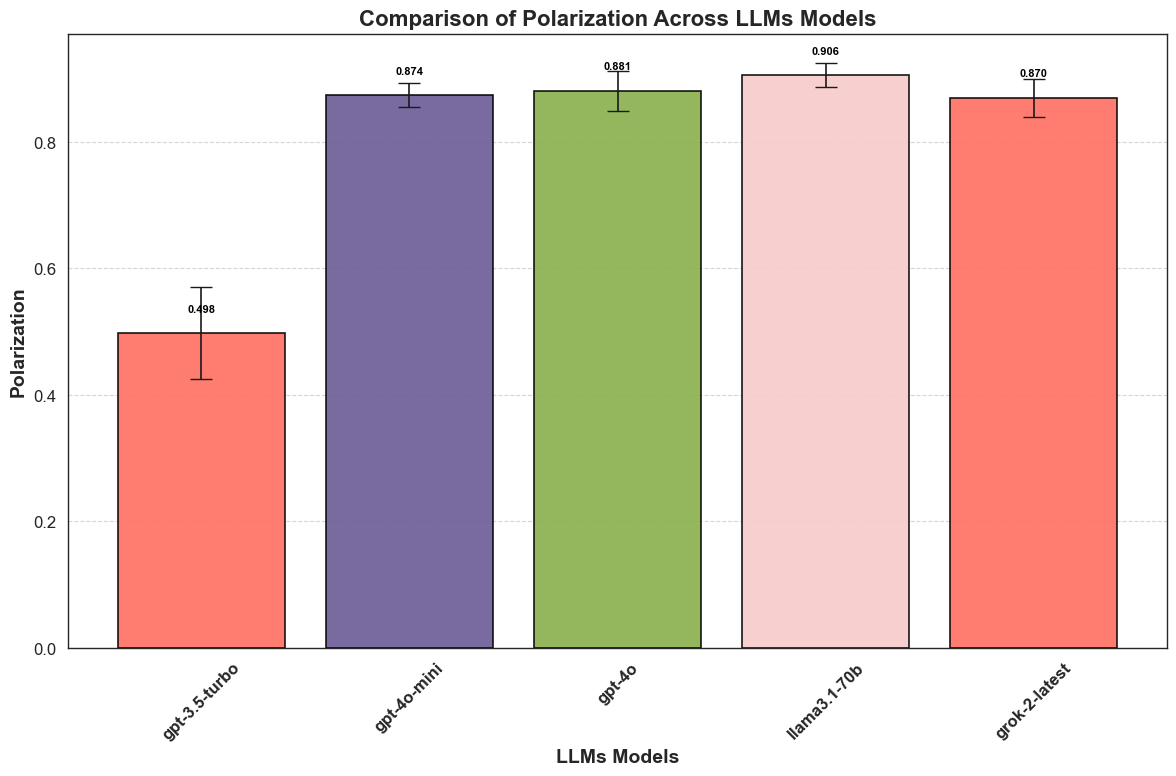

In [237]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
model_names = list(results.keys())
means = [results[model][0] for model in model_names]
errors = [results[model][1] for model in model_names]

# Define the figure and axes
plt.figure(figsize=(12, 8))

# Create a bar plot with custom styling
bars = plt.bar(
    model_names,
    means,
    yerr=errors,
    capsize=8,
    alpha=0.9,
    color=['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9'],  # Custom colors
    edgecolor='black',
    linewidth=1.2
)

# Add value annotations above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.03,  # Position slightly above the bar
        f'{height:.3f}',
        ha='center',
        va='bottom',
        fontsize=8,
        color='black',
        fontweight='bold'
    )

# Customize the axes
plt.xlabel('LLMs Models', fontsize=14, fontweight='bold')
plt.ylabel('Polarization', fontsize=14, fontweight='bold')
plt.title('Comparison of Polarization Across LLMs Models', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Comparison to classical models (Eordos-Renyie, Barabasi-Albert, Watt-Strogatz)

In [238]:
metrics = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Degree centrality']
real_mean = network_df[network_df['save_name'] == 'real'].groupby('metric_name')['_metric_value'].agg(['mean', 'sem'])
real_mean

,mean,sem
metric_name,,
Avg clustering coef,0.454084,0.042551
Avg shortest path,0.635332,0.047373
Betweenness centrality,0.032375,0.002592
Closeness centrality,0.428230,0.006916
Degree centrality,0.175672,0.008144
Density,0.197454,0.046188
Diameter,1.307066,0.121943
Modularity,0.379483,0.050264
Prop nodes LCC,0.989583,0.010417


In [239]:
n = 100
total_edges = n * (n-1) / 2
real_density = real_mean.loc['Density']['mean'] # real networks' mean density
exp_edges = total_edges * real_density
print(exp_edges)

977.3990839620802


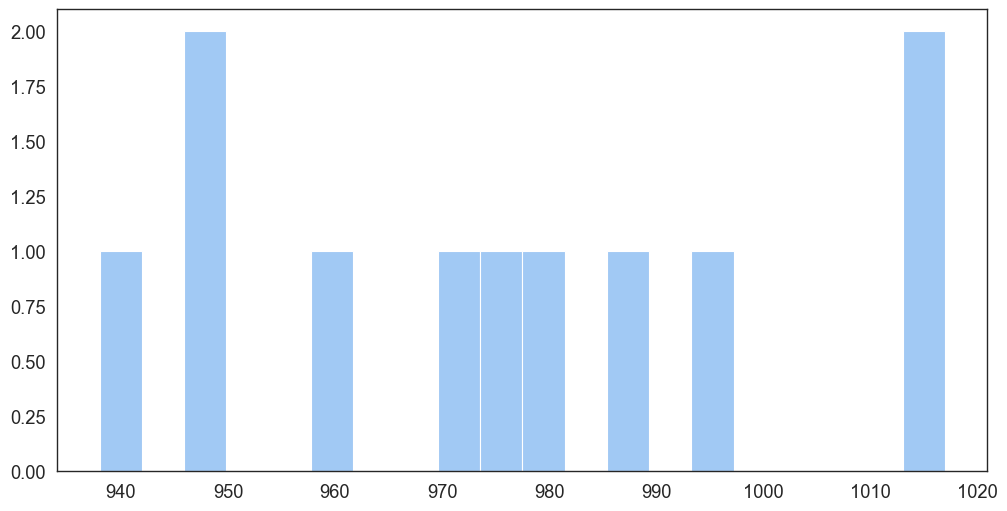

In [240]:
# erdos-renyi
p = real_density
edges = []
for s in range(11):
    G = nx.erdos_renyi_graph(n, p, seed=s)
    edges.append(len(G.edges()))
    fn = os.path.join(PATH_TO_TEXT_FILES, f'er_{s}.adj')
    nx.write_adjlist(G, fn)
plt.hist(edges, bins=20)
plt.show()

Using m = 7
{651}


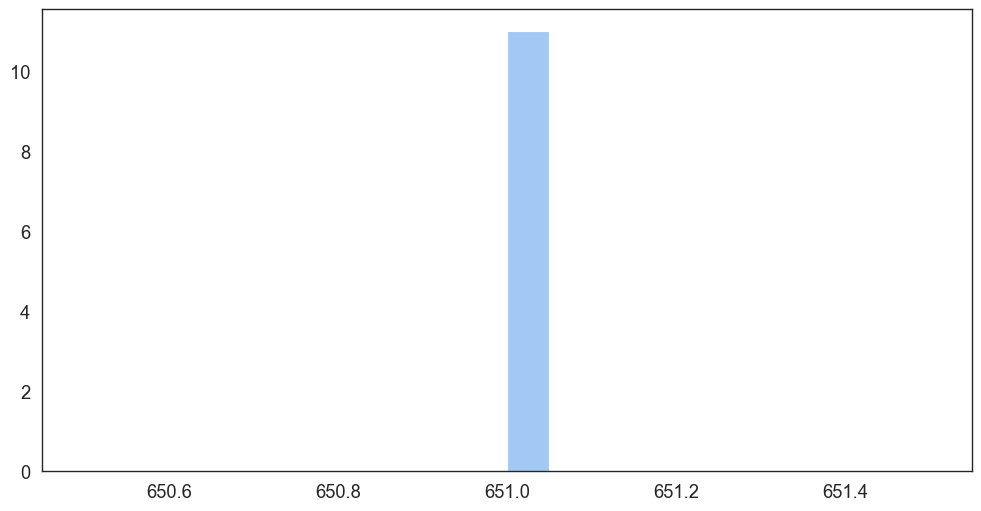

In [241]:
# barabasi-albert
n = 100
best_m = None 
best_diff = 1e6
for m in range(1, 8):
    G = nx.barabasi_albert_graph(n, m, seed=s)
    num_edges = len(G.edges())
    diff = np.abs(len(G.edges()) - exp_edges)
    if diff < best_diff:
        best_diff = diff 
        best_m = m 
print('Using m =', best_m)

edges = []
for s in range(11):
    G = nx.barabasi_albert_graph(n, best_m, seed=s)
    edges.append(len(G.edges()))
    fn = os.path.join(PATH_TO_TEXT_FILES, f'ba_{s}.adj')
    nx.write_adjlist(G, fn)
print(set(edges))
plt.hist(edges, bins=20)
plt.show()

In [242]:
# watts-strogatz 
for k in np.arange(4, 16, 2):
    for p in np.arange(0.05, 0.16, 0.05):
        for s in range(5):
            G = nx.watts_strogatz_graph(n, k, p, seed=s)
            assert len(G.edges()) == (n*k)/2

In [243]:
# fit k (number of neighbors)
best_k = None 
best_diff = 1e6
p = 0.01
for k in np.arange(8, 13, 2):
    G = nx.watts_strogatz_graph(n, k, p, seed=s)
    num_edges = len(G.edges())
    assert num_edges == (n*k)/2
    diff = np.abs(num_edges - exp_edges)
    print(k, diff)
    if diff < best_diff:
        best_diff = diff 
        best_k = k 
print('Using k =', best_k)

8 577.3990839620802
10 477.3990839620802
12 377.3990839620802
Using k = 12


best p =  0.14


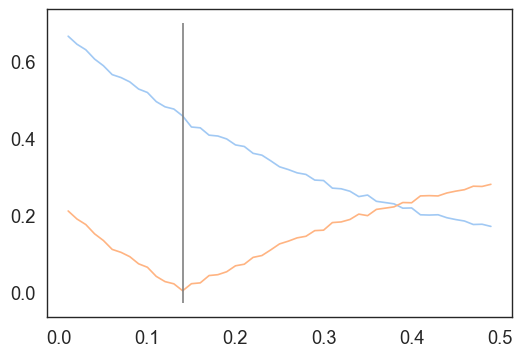

In [244]:
# fit p (rewiring probability)
best_p = None 
best_diff = 1e6
p_options = np.arange(0.01, 0.5, 0.01)
p_clustering = []
for p in p_options:
    clustering = []
    for s in range(11):
        G = nx.watts_strogatz_graph(n, best_k, p)
        clustering.append(nx.average_clustering(G))
    p_clustering.append(np.mean(clustering))
plt.figure(figsize=(6,4))
plt.plot(p_options, p_clustering)
diff = np.abs(p_clustering - real_mean.loc['Avg clustering coef']['mean'])
plt.plot(p_options, diff)
min_val = p_options[np.argmin(diff)]
best_p = min_val.round(3)
print('best p = ', best_p)
ymin, ymax = plt.ylim()
plt.vlines([min_val], ymin, ymax, color='grey')
plt.show()

In [245]:
for s in range(11):
    G = nx.watts_strogatz_graph(n, best_k, best_p, seed=s)
    fn = os.path.join(PATH_TO_TEXT_FILES, f'ws_{s}.adj')
    nx.write_adjlist(G, fn)

In [246]:
# summarize network models
min_seed = 0
max_seed = 10
for model in ['er', 'ba', 'ws']: 
    list_of_G, t1, t2 = load_list_of_graphs(model, min_seed, max_seed+1, directed=False, include_ts=True)
    print(f'{model}: found {len(list_of_G)} graphs ({t1} TO {t2})')
    summarize_network_metrics(list_of_G, None, None, model, demos=False)
    print()

er: found 11 graphs (Wed Jan 15 18:46:35 2025 TO Wed Jan 15 18:46:35 2025)
Saved network metrics to ./stats\er\network_metrics.csv
Saved node metrics to ./stats\er\node_metrics.csv

ba: found 11 graphs (Wed Jan 15 18:46:35 2025 TO Wed Jan 15 18:46:35 2025)
Saved network metrics to ./stats\ba\network_metrics.csv
Saved node metrics to ./stats\ba\node_metrics.csv

ws: found 11 graphs (Wed Jan 15 18:46:39 2025 TO Wed Jan 15 18:46:39 2025)
Saved network metrics to ./stats\ws\network_metrics.csv
Saved node metrics to ./stats\ws\node_metrics.csv



In [247]:
network_df = pd.read_csv(f'stats/real/network_metrics.csv')
metric_dfs = [network_df]
homophily_dfs = []

# load network metrics and homophily for generated networks
model = 'gpt-3.5-turbo'
for method in ['sequential']: # , 'iterative']:
    metric_dfs.append(pd.read_csv(f'stats/{method}_{model}/network_metrics.csv'))

for model in ['er', 'ba', 'ws']:
    metric_dfs.append(pd.read_csv(f'stats/{model}/network_metrics.csv'))

network_df = pd.concat(metric_dfs)
print(network_df.groupby('save_name').size())

save_name
ba                           132
er                           132
real                        1097
sequential_gpt-3.5-turbo     132
ws                           132
dtype: int64


In [248]:
network_df['save_name'].unique()

array(['real', 'sequential_gpt-3.5-turbo', 'er', 'ba', 'ws'], dtype=object)

In [249]:
network_df['metric_name'].unique()

array(['density', 'avg_clustering_coef', 'prop_nodes_lcc', 'radius',
       'diameter', 'avg_shortest_path', 'modularity', 'degree_centrality',
       'betweenness_centrality', 'closeness_centrality', 'assortativity',
       'efficiency', 'degree_gini', 'pagerank_avg',
       'pagerank_normalized_entropy'], dtype=object)

In [250]:
results = []
for method in ['er', 'ba', 'ws',  'sequential']:
    if len(method) > 2:
        save_name = f'{method}_gpt-3.5-turbo'
    else:
        save_name = method
    for metric in ['density', 'avg_clustering_coef', 'prop_nodes_lcc', 'avg_shortest_path', 'modularity']:
        print(metric)
        mean_diff, mean_diff_norm, ks_stat, ks_pval = compare_network_metrics(network_df, metric, save_name)
        results.append({'method': method, 'metric': metric, 'mean_diff': mean_diff, 'mean_diff_norm': mean_diff_norm,
                        'ks_stat': ks_stat, 'ks_pval': ks_pval})
df = pd.DataFrame(results)
df.round(3)

density
Found 8 real and 11 generated values
avg_clustering_coef
Found 8 real and 11 generated values
prop_nodes_lcc
Found 8 real and 11 generated values
avg_shortest_path
Found 8 real and 11 generated values
modularity
Found 8 real and 11 generated values
density
Found 8 real and 11 generated values
avg_clustering_coef
Found 8 real and 11 generated values
prop_nodes_lcc
Found 8 real and 11 generated values
avg_shortest_path
Found 8 real and 11 generated values
modularity
Found 8 real and 11 generated values
density
Found 8 real and 11 generated values
avg_clustering_coef
Found 8 real and 11 generated values
prop_nodes_lcc
Found 8 real and 11 generated values
avg_shortest_path
Found 8 real and 11 generated values
modularity
Found 8 real and 11 generated values
density
Found 8 real and 11 generated values
avg_clustering_coef
Found 8 real and 11 generated values
prop_nodes_lcc
Found 8 real and 11 generated values
avg_shortest_path
Found 8 real and 11 generated values
modularity
Found 8 r

,method,metric,mean_diff,mean_diff_norm,ks_stat,ks_pval
0,er,density,0.000,0.002,0.625,0.033
1,er,avg_clustering_coef,0.258,2.291,1.000,0.000
2,er,prop_nodes_lcc,0.010,0.378,0.125,1.000
3,er,avg_shortest_path,0.240,1.919,1.000,0.000
4,er,modularity,0.216,1.627,1.000,0.000
5,ba,density,0.066,0.540,0.750,0.005
6,ba,avg_clustering_coef,0.217,1.926,1.000,0.000
7,ba,prop_nodes_lcc,0.010,0.378,0.125,1.000
8,ba,avg_shortest_path,0.197,1.569,1.000,0.000
9,ba,modularity,0.176,1.326,0.784,0.003
